In [5]:
from functions_load import load_and_process

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=load_and_process('C:\\Users\\mehdi\\data301\\course-project-solo_506-1\\data\\raw\\Data.csv')

C:\Users\mehdi\miniconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\mehdi\miniconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\mehdi\miniconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [12]:
df

,cps19_religion,cps19_province,cps19_yob,cps19_employment,cps19_gender,cps19_education,cps19_imm,cps19_bornin_canada,cps19_econ_retro,cps19_own_fin_retro,pes19_votechoice2019,pes19_nativism1,pes19_nativism5,pes19_immigjobs,age
82,11.0,Ontario,72,Working for pay full-time,Female,Master degree,About the same number of immigrants as now,Canadian,Stayed about the same,2,Liberal,Somewhat disagree,Strongly disagree,Somewhat disagree,28
83,1.0,British Columbia,41,Retired,Male,Bachelor degree,Fewer immigrants,Canadian,Got worse,2,Conservative,Somewhat agree,Strongly disagree,Strongly disagree,59
88,1.0,Alberta,35,Retired,Male,Bachelor degree,More immigrants,Canadian,Got worse,2,Conservative,Neither agree nor disagree,Strongly disagree,Strongly disagree,65
114,15.0,Newfoundland and Labrador,36,Working for pay part-time,Female,Completed technical,Fewer immigrants,Canadian,Got worse,2,Conservative,Strongly agree,Somewhat agree,Somewhat agree,64
143,18.0,Ontario,46,Working for pay full-time,Female,Bachelor degree,Fewer immigrants,Canadian,Got better,1,Liberal,Somewhat agree,Somewhat disagree,Somewhat disagree,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37803,10.0,New Brunswick,78,Student,Female,Some university,More immigrants,Canadian,Stayed about the same,3,Green Party,Somewhat disagree,Somewhat disagree,Somewhat disagree,22
37808,10.0,Newfoundland and Labrador,50,Working for pay full-time,Male,Bachelor degree,Fewer immigrants,Canadian,Stayed about the same,2,Liberal,Strongly agree,Neither agree nor disagree,Somewhat agree,50
37810,17.0,Ontario,25,Working for pay full-time,Male,Some technical,Fewer immigrants,Canadian,Stayed about the same,2,NDP,Somewhat disagree,Neither agree nor disagree,Neither agree nor disagree,75
37815,1.0,Quebec,38,Working for pay full-time,Male,Some university,About the same number of immigrants as now,Canadian,Got better,2,Bloc Québécois,Somewhat agree,Strongly disagree,Strongly disagree,62


In [5]:
import pandas_profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof

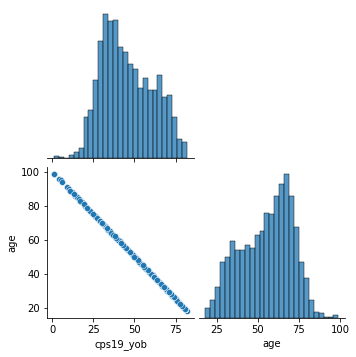

In [8]:
sns.pairplot(df,corner=True)

<AxesSubplot:xlabel='age', ylabel='pes19_votechoice2019'>

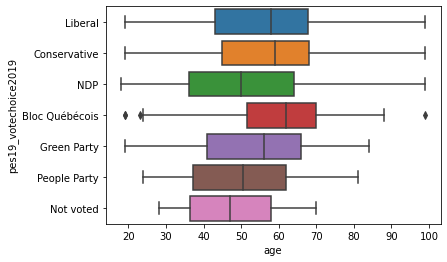

In [9]:
sns.boxplot(x='age',y='pes19_votechoice2019',data=df)